In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

In [2]:
!ls

Untitled.ipynb              rlinux_output-e1-t1-0.txt
debian_output-e1-t1-0.txt   rlinux_output-e1-t1-1.txt
debian_output-e1-t1-1.txt   rlinux_output-e1-t1-2.txt
debian_output-e1-t1-2.txt   rlinux_output-e1-t1-3.txt
debian_output-e1-t1-3.txt   rlinux_output-e1-t1-5.txt
debian_output-e1-t1-5.txt   rlinux_output-e1-t1-6.txt
debian_output-e1-t1-6.txt   rlinux_output-e1-t1-7.txt
debian_output-e1-t1-7.txt   rlinux_output-e1-t1-8.txt
debian_output-e1-t1-8.txt   rlinux_output-e1-t1-9.txt
debian_output-e1-t1-9.txt   rlinux_output-e1-t100-0.txt
debian_output-e1-t100-0.txt rlinux_output-e1-t100-1.txt
debian_output-e1-t100-1.txt rlinux_output-e1-t100-2.txt
debian_output-e1-t100-2.txt rlinux_output-e1-t100-3.txt
debian_output-e1-t100-3.txt rlinux_output-e1-t100-5.txt
debian_output-e1-t100-5.txt rlinux_output-e1-t100-6.txt
debian_output-e1-t100-6.txt rlinux_output-e1-t100-7.txt
debian_output-e1-t100-7.txt rlinux_output-e1-t100-8.txt
debian_output-e1-t100-8.txt rlinux_output-e1-t100-9.txt
debian_out

In [3]:
def seila(maq, esc, sz, trace):
    files = ["{}_output-e{}-t{}-{}.txt".format(maq, esc, sz, i) for i in [1, 2, 3, 5, 6, 7, 8, 9]]

    todos = pd.DataFrame()

    for f_name in files:
        n = pd.read_csv(f_name, sep=" ", header=None)
        todos = pd.concat([todos, n.iloc[0:11]])
        
    trace1 = pd.read_csv("../{}".format(trace), sep=" ", header=None)
    procs = todos.merge(trace1, left_on=0, right_on=0)

    procs.columns = ["nome_proc", "tf", "dt", "t0", "dt", "deadline"]
    dif = (procs["deadline"] - procs["tf"]).values
    return dif

In [4]:
debian_1_1 = seila("debian", 1, 1, "trace1.txt")
debian_1_50 = seila("debian", 1, 50, "t50.txt")
debian_1_100 = seila("debian", 1, 100, "t100.txt")

debian_2_1 = seila("debian", 2, 1, "trace1.txt")
debian_2_50 = seila("debian", 2, 50, "t50.txt")
debian_2_100 = seila("debian", 2, 100, "t100.txt")

debian_3_1 = seila("debian", 3, 1, "trace1.txt")
debian_3_50 = seila("debian", 3, 50, "t50.txt")
debian_3_100 = seila("debian", 3, 100, "t100.txt")

rlinux_1_1 = seila("rlinux", 1, 1, "trace1.txt")
rlinux_1_50 = seila("rlinux", 1, 50, "t50.txt")
rlinux_1_100 = seila("rlinux", 1, 100, "t100.txt")

rlinux_2_1 = seila("rlinux", 2, 1, "trace1.txt")
rlinux_2_50 = seila("rlinux", 2, 50, "t50.txt")
rlinux_2_100 = seila("rlinux", 2, 100, "t100.txt")

rlinux_3_1 = seila("rlinux", 3, 1, "trace1.txt")
rlinux_3_50 = seila("rlinux", 3, 50, "t50.txt")
rlinux_3_100 = seila("rlinux", 3, 100, "t100.txt")

In [5]:
plt.figure(figsize=(9, 4))
plt.title("Debian escalonador FCFS")
plt.bar(["10", "50", "100"], [np.sum(debian_1_1 >=0), np.sum(debian_1_50 >=0), np.sum(debian_1_100 >=0)])
plt.show()

In [6]:
plt.figure(figsize=(9, 4))
plt.title("Debian escalonador SRTN")
plt.bar(["10", "50", "100"], [np.sum(debian_2_1 >=0), np.sum(debian_2_50 >=0), np.sum(debian_2_100 >=0)])
plt.show()

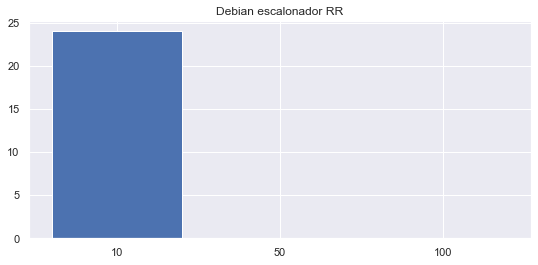

In [7]:
plt.figure(figsize=(9, 4))
plt.title("Debian escalonador RR")
plt.bar(["10", "50", "100"], [np.sum(debian_3_1 >=0), np.sum(debian_3_50 >=0), np.sum(debian_3_100 >=0)])
plt.show()

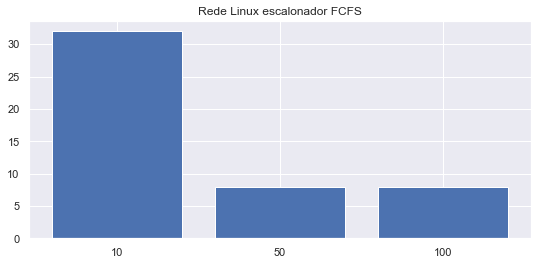

In [8]:
plt.figure(figsize=(9, 4))
plt.title("Rede Linux escalonador FCFS")
plt.bar(["10", "50", "100"], [np.sum(rlinux_1_1 >=0), np.sum(rlinux_1_50 >=0), np.sum(rlinux_1_100 >=0)])
plt.show()

In [9]:
plt.figure(figsize=(9, 4))
plt.title("Rede Linux escalonador SRTN")
plt.bar(["10", "50", "100"], [np.sum(rlinux_2_1 >=0), np.sum(rlinux_2_50 >=0), np.sum(rlinux_2_100 >=0)])
plt.show()

In [10]:
plt.figure(figsize=(9, 4))
plt.title("Rede Linux escalonador RR")
plt.bar(["10", "50", "100"], [np.sum(rlinux_3_1 >=0), np.sum(rlinux_3_50 >=0), np.sum(rlinux_3_100 >=0)])
plt.show()

In [21]:
def context(maq, esc, sz):
    files = ["{}_output-e{}-t{}-{}.txt".format(maq, esc, sz, i) for i in [1, 2, 3, 5, 6, 7, 8, 9]]

    trocas = []

    for f_name in files:
        n = pd.read_csv(f_name, sep=" ", header=None)
        trocas.append(int(n.iloc[-1, 0]))
    return trocas

In [23]:
debian_1_1 = context("debian", 1, 1)
debian_1_50 = context("debian", 1, 50)
debian_1_100 = context("debian", 1, 100)

debian_2_1 = context("debian", 2, 1)
debian_2_50 = context("debian", 2, 50)
debian_2_100 = context("debian", 2, 100)

debian_3_1 = context("debian", 3, 1)
debian_3_50 = context("debian", 3, 50)
debian_3_100 = context("debian", 3, 100)

rlinux_1_1 = context("rlinux", 1, 1)
rlinux_1_50 = context("rlinux", 1, 50)
rlinux_1_100 = context("rlinux", 1, 100)

rlinux_2_1 = context("rlinux", 2, 1)
rlinux_2_50 = context("rlinux", 2, 50)
rlinux_2_100 = context("rlinux", 2, 100)

rlinux_3_1 = context("rlinux", 3, 1)
rlinux_3_50 = context("rlinux", 3, 50)
rlinux_3_100 = context("rlinux", 3, 100)

In [24]:
plt.figure(figsize=(9, 4))
plt.title("Debian escalonador FCFS")
plt.bar(["10", "50", "100"], [np.mean(debian_1_1), np.mean(debian_1_50), np.mean(debian_1_100)])
plt.ylabel("Trocas de contexto")
plt.xlabel("Quantidade de processos")
plt.show()

In [25]:
plt.figure(figsize=(9, 4))
plt.title("Debian escalonador SRTN")
plt.bar(["10", "50", "100"], [np.mean(debian_2_1), np.mean(debian_2_50), np.mean(debian_2_100)])
plt.ylabel("Trocas de contexto")
plt.xlabel("Quantidade de processos")
plt.show()

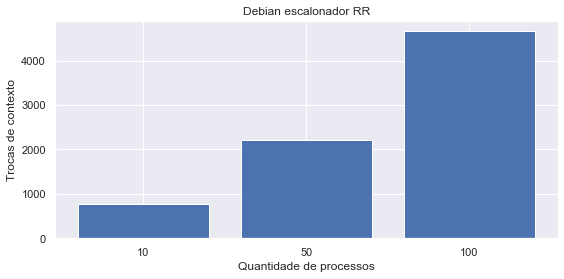

In [26]:
plt.figure(figsize=(9, 4))
plt.title("Debian escalonador RR")
plt.bar(["10", "50", "100"], [np.mean(debian_3_1), np.mean(debian_3_50), np.mean(debian_3_100)])
plt.ylabel("Trocas de contexto")
plt.xlabel("Quantidade de processos")
plt.show()

In [27]:
plt.figure(figsize=(9, 4))
plt.title("Rede Linux escalonador FCFS")
plt.bar(["10", "50", "100"], [np.mean(rlinux_1_1), np.mean(rlinux_1_50), np.mean(rlinux_1_100)])
plt.ylabel("Trocas de contexto")
plt.xlabel("Quantidade de processos")
plt.show()

In [28]:
plt.figure(figsize=(9, 4))
plt.title("Rede Linux escalonador SRTN")
plt.bar(["10", "50", "100"], [np.mean(rlinux_2_1), np.mean(rlinux_2_50), np.mean(rlinux_2_100)])
plt.ylabel("Trocas de contexto")
plt.xlabel("Quantidade de processos")
plt.show()

In [29]:
plt.figure(figsize=(9, 4))
plt.title("Rede Linux escalonador RR")
plt.bar(["10", "50", "100"], [np.mean(rlinux_3_1), np.mean(rlinux_3_50), np.mean(rlinux_3_100)])
plt.ylabel("Trocas de contexto")
plt.xlabel("Quantidade de processos")
plt.show()